In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_nn import *

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [3]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [5]:
print(valloader)
len(valloader)

157

64 images in each batch and each image has a dimension of 28 x 28 pixels


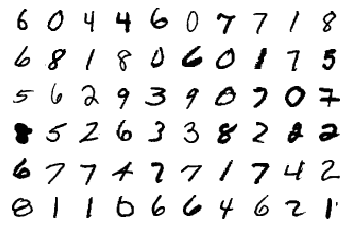

In [6]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

### Model definition
The model is defined, specifying the structure of the fully connected neural network through the vector *hidden_sizes*.

In [19]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
model=fully_connected_NN(sizes)
print(model)

# Loss of the model is defined.
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### Training
The model is trained with SGD, used as baseline.

In [20]:
lr=0.003
momentum=0.9
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15

test_losses, train_losses,accurac = optimize(optimizer, epochs, trainloader,valloader, model, criterion)

Epoch 0
Training loss: 0.6470960832989292
Number Of Images Tested = 10000
Model Accuracy = 0.9023
Test loss: 0.32337318503173296 

Epoch 1
Training loss: 0.27666563076823
Number Of Images Tested = 10000
Model Accuracy = 0.9337
Test loss: 0.22929090811948108 

Epoch 2
Training loss: 0.2135499746902093
Number Of Images Tested = 10000
Model Accuracy = 0.9387
Test loss: 0.20443812169276984 

Epoch 3
Training loss: 0.17473754522674628
Number Of Images Tested = 10000
Model Accuracy = 0.9524
Test loss: 0.16117212119375823 

Epoch 4
Training loss: 0.14552289169075203
Number Of Images Tested = 10000
Model Accuracy = 0.9579
Test loss: 0.1405211665258286 

Epoch 5
Training loss: 0.12401587363066417
Number Of Images Tested = 10000
Model Accuracy = 0.9613
Test loss: 0.13179372284252933 

Epoch 6
Training loss: 0.10728666354129628
Number Of Images Tested = 10000
Model Accuracy = 0.9631
Test loss: 0.12166025194155562 

Epoch 7
Training loss: 0.09473034218430265
Number Of Images Tested = 10000
Model A

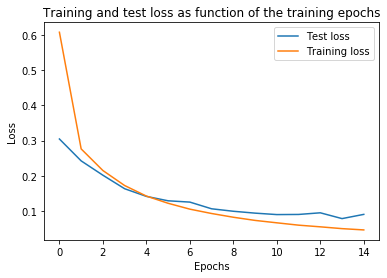

In [9]:
plt.plot(test_losses,label='Test loss')
plt.plot(train_losses,label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test loss as function of the training epochs')
plt.legend()

Text(0.5, 1.0, 'Accuracy as function of the training epochs')

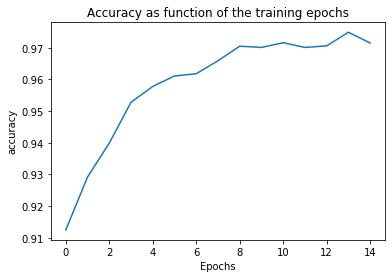

In [10]:
plt.plot(accurac)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy as function of the training epochs')

In [68]:
# This cell gives insight into how the prediction process works.
images, labels = next(iter(valloader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Probabilities computed for each digit =\n",probab)
print("\nPredicted Digit =", probab.index(max(probab)))
print("Actual Digit =",labels[0].numpy())
#view_classify(img.view(1, 28, 28), ps)

Probabilities computed for each digit =
 [4.632957e-06, 5.140131e-05, 1.9065958e-05, 0.9926165, 0.0036483733, 0.00041103543, 1.1146047e-05, 0.0031636038, 1.10238325e-05, 6.3191e-05]

Predicted Digit = 3
Actual Digit = 3


In [52]:
probabilities, predicctions = predict_one_img(valloader,model)

Probabilities computed for each digit =
 [3.0963787e-16, 1.6100303e-16, 1.0272674e-13, 2.8647522e-09, 2.0396508e-14, 2.2982263e-12, 8.063883e-14, 4.531942e-22, 1.0, 1.0583134e-12]

Predicted Digit = 8
Actual Digit = 8


### Test
The trained model is used to predict the labels of the test set, and the model performance is evaluated.

In [53]:
accuracy = accuracy_test(valloader, model)

Number Of Images Tested = 10000

Model Accuracy = 0.9803


### Test LBFGS



In [16]:
def LBFGS_optimizer(parameter):
    lr=1
    max_iter=10
    max_eval=None
    tolerance_grad=1e-5
    tolerance_change=1e-9
    history_size=7
    line_search_fn= 'strong_wolfe'
    return torch.optim.LBFGS(parameter, lr, max_iter, max_eval, tolerance_grad, tolerance_change, history_size, line_search_fn)

In [8]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

method = "LBFGS"

# The model is built
model=fully_connected_NN(sizes)
print(model)

# Loss of the model is defined.
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [18]:
optimizer = LBFGS_optimizer(model.parameters())
time0 = time()
epochs = 5

test_losses, train_losses,accurac = optimize(optimizer, epochs, trainloader,valloader, model, criterion,method)

Epoch 0
Training loss: 0.043495106456349165
Number Of Images Tested = 10000
Model Accuracy = 0.8848
Test loss: 0.4748318502857427 

Epoch 1
Training loss: 0.032172130598525396
Number Of Images Tested = 10000
Model Accuracy = 0.912
Test loss: 0.6797724026640889 

Epoch 2
Training loss: 0.04947452354331094
Number Of Images Tested = 10000
Model Accuracy = 0.8675
Test loss: 1.143757738302585 

Epoch 3
Training loss: 0.05155916133913839
Number Of Images Tested = 10000
Model Accuracy = 0.9143
Test loss: 0.5972253471719706 

Epoch 4
Training loss: 0.06886943806729741
Number Of Images Tested = 10000
Model Accuracy = 0.8878
Test loss: 0.7982812390965262 


Training Time (in minutes) = 4.532917857170105


### Stochastic LBFGS

In [22]:
from lbfgsnew import LBFGSNew

In [ ]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

method = "LBFGS"

# The model is built
model=fully_connected_NN(sizes)
print(model)

# Loss of the model is defined.
criterion = nn.NLLLoss()

In [23]:
optimizer = LBFGSNew( model.parameters(), history_size=10, max_iter=4, line_search_fn=True,batch_mode=True)
time0 = time()
epochs = 15

test_losses, train_losses,accurac = optimize(optimizer, epochs, trainloader,valloader, model, criterion,method)

Epoch 0
Training loss: 0.22884345317938562
Number Of Images Tested = 10000
Model Accuracy = 0.8983
Test loss: 0.32651713129821097 

Epoch 1
Training loss: 0.037982378194211866
Number Of Images Tested = 10000
Model Accuracy = 0.9423
Test loss: 0.19146671340723706 

Epoch 2
Training loss: 0.015468076785911184
Number Of Images Tested = 10000
Model Accuracy = 0.959
Test loss: 0.13863945700180758 

Epoch 3
Training loss: 0.008733484627758917
Number Of Images Tested = 10000
Model Accuracy = 0.964
Test loss: 0.12973696717867853 

Epoch 4
Training loss: 0.006082365844351079
Number Of Images Tested = 10000
Model Accuracy = 0.9496
Test loss: 0.19034825213799242 

Epoch 5
Training loss: 0.00455313073500975
Number Of Images Tested = 10000
Model Accuracy = 0.9673
Test loss: 0.12438689760424813 

Epoch 6
Training loss: 0.00341799494686044
Number Of Images Tested = 10000
Model Accuracy = 0.9689
Test loss: 0.1275715323791255 

Epoch 7
Training loss: 0.002794444950415752
Number Of Images Tested = 10000

### Test Hessian free 

to be impove

In [ ]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

method = "HF"

# The model is built
model=fully_connected_NN(sizes)
print(model)

# Loss of the model is defined.
criterion = nn.NLLLoss()

In [ ]:
from hessianfree import HessianFree

In [ ]:
optimizer = HessianFree(model.parameters(), use_gnm=True, verbose=True)
time0 = time()
epochs = 5

test_losses, train_losses,accurac = optimize(optimizer, epochs, trainloader,valloader, model, criterion,method)